# ドルコスト平均法
1. 下がったら買い
2. 一定額を買う

## ランダムウォークのシリーズを作成

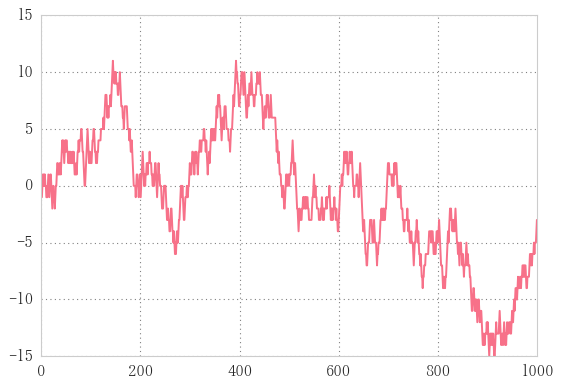

In [46]:
n = 1000
bullbear = pd.Series(np.random.randint(-1, 2, n))
price = bullbear.cumsum()
price.plot()

## 前日より値が低かったら買い、高かったら見過ごし
ドルコスト平均法の(1)

In [48]:
position = np.zeros(len(se))  # seと同じ長さの配列を作成
for i in price.index[:-1]:
    if price[i+1] - price[i] < 0:  # 前日の値のほうが小さければ高ければ安くなっているということ
        position[i]=price[i]  # そのときのpriceで買い
position

array([  0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
        -1.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   4.,
         0.,   4.,   3.,   0.,   0.,   4.,   0.,   0.,   4.,   0.,   3.,
         0.,   3.,   0.,   3.,   0.,   3.,   0.,   0.,   0.,   3.,   0.,
         3.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   4.,
         0.,   0.,   0.,   0.,   0.,   5.,   4.,   0.,   3.,   2.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   5.,   4.,   3.,   0.,   0.,
         3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   4.,   0.,
         3.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,
         8.,   7.,   0.,   7.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,
         0.,   0.,  11.,   0.,  10.,   0.,  10.,   

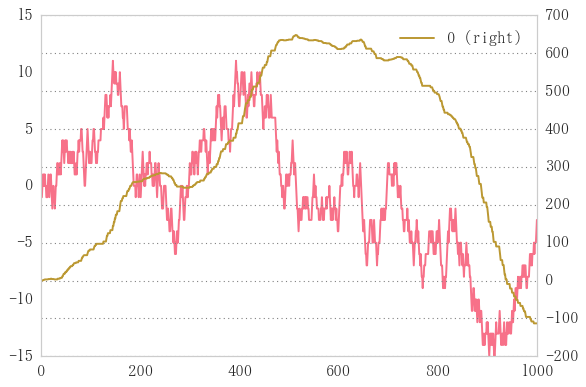

In [50]:
fig, ax = plt.subplots()
price.plot(ax=ax)
pd.DataFrame(position).cumsum().plot(ax=ax, secondary_y=True)  # ポジションのcumulative sumをプロット

### priceからbullbearの計算

In [80]:
def p2b(price):
    return price.sub(price.shift(1), fill_value=0)

In [81]:
np.array_equal(p2b(price), np.array(bullbear))

True

`p2b`関数によってbullbearの計算が可能となった。

## 効率化

In [51]:
def dob(price):
    pos = np.zeros(len(price))  # priceと同じ長さの配列を作成
    for i in price.index[:-1]:
        if price[i+1]<price[i]:  # 前日の値より安ければ
            pos[i]=price[i]  # 買い
    return pos

In [53]:
%timeit dob(price)

10 loops, best of 3: 28.1 ms per loop


In [55]:
%timeit [price[i] if price[i+1]<price[i] else 0 for i in price.index[:-1]]

10 loops, best of 3: 28.3 ms per loop


In [58]:
def dob2(price):
    pos = np.zeros(len(price))  # priceと同じ長さの配列を作成
    pos = [price[i] if price.sub(price.shift(1), fill_value=0)<0 else 0]  # 下がったら買い
    return pos

In [88]:
price[np.array(bullbear)<0]

0      -1
5       0
7       0
9       0
11     -1
16      0
17     -1
21      0
22     -1
23     -2
26     -1
28     -2
35      1
40      1
44      3
46      3
47      2
50      3
53      3
55      2
57      2
59      2
61      2
65      2
67      2
68      1
72      1
77      3
83      4
84      3
       ..
899   -13
901   -13
902   -14
903   -15
907   -14
910   -14
912   -14
913   -15
918   -13
925   -12
926   -13
927   -14
931   -14
934   -13
935   -14
937   -14
940   -13
946   -13
950   -12
954   -11
958   -10
962    -9
967    -9
972    -8
974    -8
977    -8
978    -9
987    -7
989    -7
994    -6
dtype: int32

In [60]:
dob2(price)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [41]:
pd.DataFrame([se.shift(1), se, se.sub(se.shift(1), fill_value=0), bullbear]).T

,0,1,2,3
0,NaN,1.0,1.0,1.0
1,1.0,2.0,1.0,1.0
2,2.0,1.0,-1.0,-1.0
3,1.0,2.0,1.0,1.0
4,2.0,1.0,-1.0,-1.0
5,1.0,1.0,0.0,0.0
6,1.0,1.0,0.0,0.0
7,1.0,2.0,1.0,1.0
8,2.0,2.0,0.0,0.0
9,2.0,3.0,1.0,1.0


In [27]:
se.shift(1).sub(se, fill_value=0)

0      0.0
1      0.0
2     -1.0
3      1.0
4      0.0
5     -1.0
6      1.0
7     -1.0
8      1.0
9      0.0
10     1.0
11     1.0
12     0.0
13    -1.0
14     1.0
15     1.0
16    -1.0
17     1.0
18     1.0
19     0.0
20     0.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     0.0
27     1.0
28     1.0
29     0.0
      ... 
970    1.0
971   -1.0
972    1.0
973    1.0
974    0.0
975    0.0
976    0.0
977    0.0
978    1.0
979    0.0
980    1.0
981   -1.0
982    0.0
983    1.0
984    1.0
985    0.0
986    1.0
987   -1.0
988    0.0
989    1.0
990    1.0
991    1.0
992   -1.0
993    0.0
994   -1.0
995    1.0
996    1.0
997    0.0
998    1.0
999    0.0
dtype: float64

In [26]:
[se[i] if se.shift(1).sub(se, fill_value=0)>0 else 0 for i in se]


AttributeError: module 'pandas' has no attribute 'sub'

In [12]:
pd.DataFrame([se.shift(1), se]).T

,0,1
0,NaN,0.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,0.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


## 特定期間で買い

In [9]:
freq = 5 